# Importações

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import svm
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

In [2]:
params = { 'legend.fontsize': 20,
              'figure.figsize': (15,5),
              'axes.labelsize': 20,
              'axes.titlesize': 20,
              'xtick.labelsize': 20,
              'ytick.labelsize': 20 }

In [3]:
X, y = make_classification(n_samples = 10000, n_features = 10,
                          n_informative = 5 , n_redundant = 5 ,
                          n_classes = 2 , random_state = 0 )

# Treino e Teste

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   train_size = 0.7, random_state = 0, stratify=y)

In [10]:
print("Dimensões dos dados de treino x:", X_train.shape)
print("Dimensões dos dados de treino y:", y_train.shape)
print("Dimensões dos dados de teste x:", X_test.shape)
print("Dimensões dos dados de teste y:", y_test.shape)

Dimensões dos dados de treino x: (7000, 10)
Dimensões dos dados de treino y: (7000,)
Dimensões dos dados de teste x: (3000, 10)
Dimensões dos dados de teste y: (3000,)


# Aplicando o classificador

In [11]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

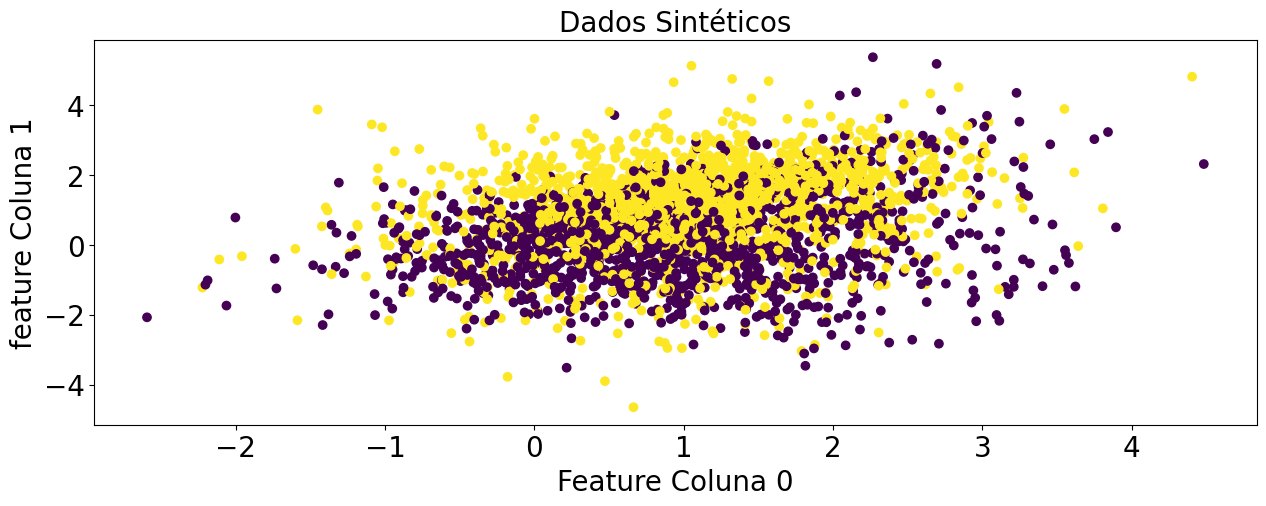

In [12]:
pylab.rcParams.update(params)
fig, ax = plt.subplots()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
ax.set_xlabel('Feature Coluna 0')
ax.set_ylabel('feature Coluna 1')
ax.set_title('Dados Sintéticos')
plt.show()

# Cross Validation

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

In [14]:
#inserindo dados no df

df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

In [15]:
df['target'].value_counts()

target
0    5000
1    5000
Name: count, dtype: int64

In [16]:
cv_scores = cross_val_score(clf, X, y, cv=10)
cv_predicts = cross_val_predict(clf,X,y,cv=10)

print("Score da acurácia para cada divisão: {}".format(cv_scores))
print("Classes previstas: {}".format(cv_predicts))
print("K-Fold Score: {}".format(np.mean(cv_scores)))
print("Total de dados: {}, Total predicted values: {}".format(df.shape[0],len(cv_predicts)))

Score da acurácia para cada divisão: [0.858 0.849 0.864 0.838 0.846 0.851 0.855 0.857 0.862 0.86 ]
Classes previstas: [0 1 1 ... 1 0 0]
K-Fold Score: 0.8539999999999999
Total de dados: 10000, Total predicted values: 10000


* Após realizar 10 divisões distintas com o modelo, podemos ver que todas obtiveram um resultado acima de 80%, sendo a média de todas as divisões igual a 85%

# Resultados

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1500
           1       0.83      0.89      0.86      1500

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



* Analisando a precisão do nosso modelo, ou seja, sua habilidade de não rotular uma amostra como positiva se ela for negativa, vemos que para a classe 0 o resultado foi superior, porém ambas satisfatórias.
* Para a sensitividade, ou seja, a capacidade do modelo de encontrar todas as amostras positivas tivemos um resultado um pouco melhor para a classe 1, porém ambas tiveram um resultado satisfatório também. 
* A média das duas métricas (F1-score) ficou em torno 80% para ambas as classes que é bem próximo do valor máximo (um) indicando uma boa harmonia entre as duas métricas.
* E a taxa total de acertos sob o total de teste também muito satisfatória (85%).